In [2]:
import numpy as np

In [ ]:
#formulate original state space equation
class ModelPredictiveControl(object):
    def __init__(self, A, B, C, f, v, W3, W4, x0, total):
        self.A=A
        self.B=B
        self.C=C
        self.f=f
        self.v=v
        self.W3=W3
        self.W4=W4
        self.total=total
# State-space dimensions
        n_states = 10  # [x, y, z, vx, vy, vz, ax, ay, az, m]
        n_controls = 2  # [T1, T2]

        self.X = np.zeros((n_states, 1))
        self.U = np.zeros((n_controls, 1))

        self.A = np.zeros((n_states, n_states))
        self.B = np.zeros((n_states, n_controls))

        self.Xnew = np.dot(A, X) + np.dot(B, U)

    def formLiftedMatrices(self):
        #f is prediction horizon
        #v is control horizon

        f=self.f
        v=self.v
        r=self.r
        n=self.n
        m=self.m
        A=self.A
        B=self.B
        C=self.C
        
        O=np.zeros(shape=(f*r,n))

        #what is r?
        #lifted matrix with C* A^i wrt prediction horizon
        for i in range(f):
            if (i==0):
                powA=A
            else:
                powA=np.matmul(powA,A)
            O[i*r:(i+1)*r,:]=np.matmul(C,powA)
            #dimensions of blocks of A are rows of CA which is rxn dim, 
            #lifted matrix of O at row index i*r to i+1*r
        
        #lifted matrix M for U
        M=np.zeros(shape=(f*r,v*m))
        #inputs: control horizon, dim of u?

        for i in range(f):
            if (i<v):
                for j in range(i+1):
                    if (j==0):
                        powA = np.eye(n,n)
                    else:
                        powA=np.matmul(powA,A)
                    M[i*r:(i+1)*r,(i-j)*m:(i-j+1)*m]=np.matmul(C,np.matmul(powA,B))
            else:
                    for j in range(v):
                        # here we form the last entry
                        if j==0:
                            sumLast=np.zeros(shape=(n,n))
                            for s in range(i-v+2):
                                if (s == 0):
                                    powA=np.eye(n,n)
                                else:
                                    powA=np.matmul(powA,A)
                                sumLast=sumLast+powA
                            M[i*r:(i+1)*r,(v-1)*m:(v)*m]=np.matmul(C,np.matmul(sumLast,B))
                        else:
                            powA=np.matmul(powA,A)
                            M[i*r:(i+1)*r,(v-1-j)*m:(v-j)*m]=np.matmul(C,np.matmul(powA,B))
            
            
            tmp1=np.matmul(M.T,np.matmul(self.W4,M))
            tmp2=np.linalg.inv(tmp1+self.W3)
            gainMatrix=np.matmul(tmp2,np.matmul(M.T,self.W4))
            
            
            return O,M,gainMatrix
                    #from control horizon to prediction horizon (where u becomes a constant)
                    #MUCH NEEDED dim analysis



        #v is prediction horizion, m is number of vars in U?

        #rows outputs, columns inputs


In [ ]:
# State-space dimensions
n_states = 24  # [x, y, z, vx, vy, vz, ax, ay, az, m]
n_controls = 2  # [T1, T2]

# f is prediction horizon
f=100
# v is control horizon
v=60

A=np.zeros((n_states, n_states))
B=np.zeros((n_states, n_controls))
C=np.zeros((n_states, n_states))

W3=np.zeros()
W4=np.zeros()

# total=


X = np.zeros((n_states, 1))
U = np.zeros((n_controls, 1))
A = np.zeros((n_states, n_states))
B = np.zeros((n_states, n_controls))
Xnew = np.dot(A, X) + np.dot(B, U)

 #create expanded Z coefficient matrix for recursive prediction repre(in for loop form)
 #model cost function of U
 #model cost function of Z

In [ ]:
for i in range(f):
    if (i==0):
        powA=A
    else:
        powA=np.matmul(powA,A)
    O[i*r:(i+1)*r,:]=np.matmul(C,powA)

# Weight Matrices For the loss function:
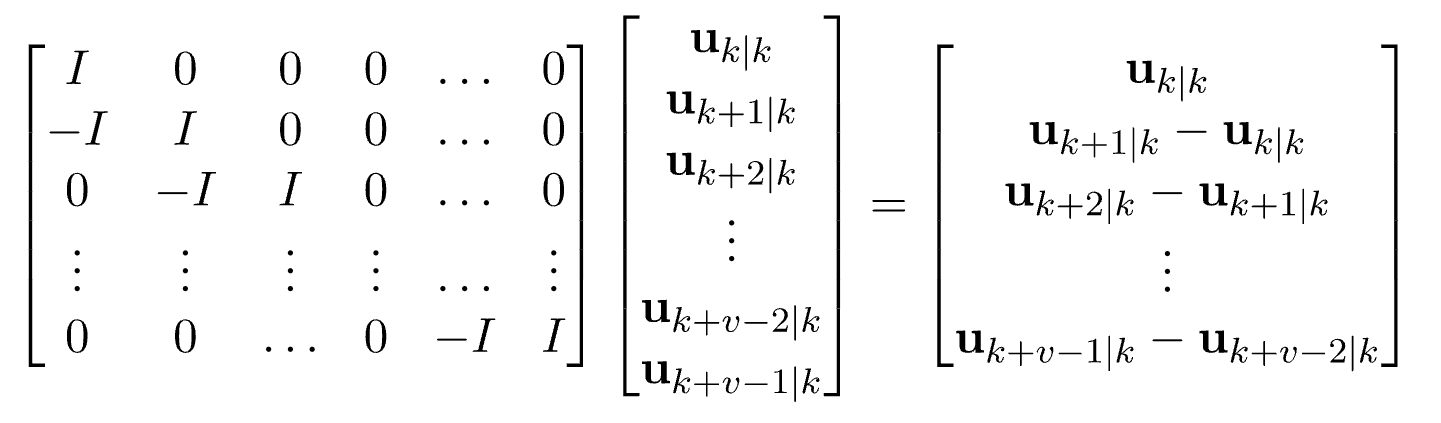

In [ ]:
w1 = np.zeros((v,v))
w2 = np.zeros((v,v))
w3 = np.zeros((v,v))



# Populating w1:
for i in np.shape(U)[0]:


# Final Step:
Use the analytical result of the optimization equation to calculate u underbar:
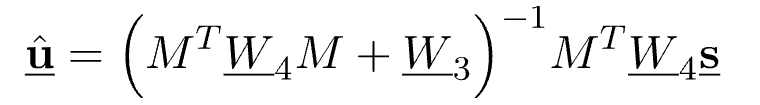